In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### https://archive.ics.uci.edu/ml/datasets/Student+Performance 
#### y - платных-дополнительные платные занятия по предмету курса (математика или португальский язык) (двоичный код: да или нет)
####  paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

In [2]:
df = pd.read_csv('student-mat.csv', sep=';')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.shape

(395, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Возможно в absences выбросы, так как 75% = 8.000000, max= 75.000000, min = 0
### количество отсутсвий в школе (от 0 до 93)

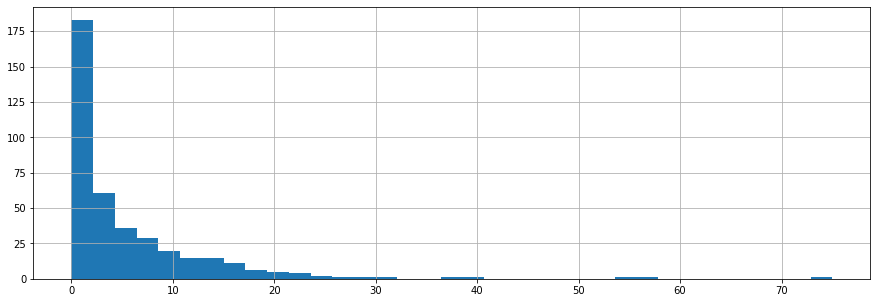

In [7]:
df['absences'].hist(bins='auto', figsize=(15,5))

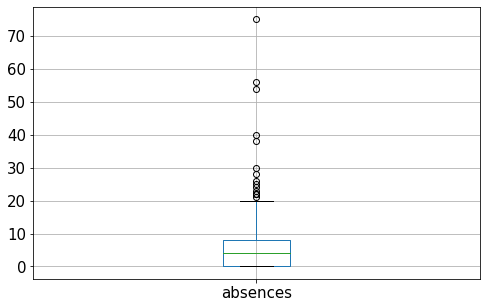

In [8]:
boxplot = df.boxplot(column=['absences'], fontsize=15, figsize=(8,5))


df.absences.value_counts()

df.isnull().sum()

In [9]:
data = df.drop(columns = ['G1', 'G2', 'G3'])

In [10]:
data["paid"] = data["paid"].astype('category')
data["paid"] = data["paid"].cat.codes

In [11]:
y = data['paid']
data = data.drop(columns = 'paid')
#data[age].corr(y)

data[:'age'].corr(y)

(13.5, -0.5)

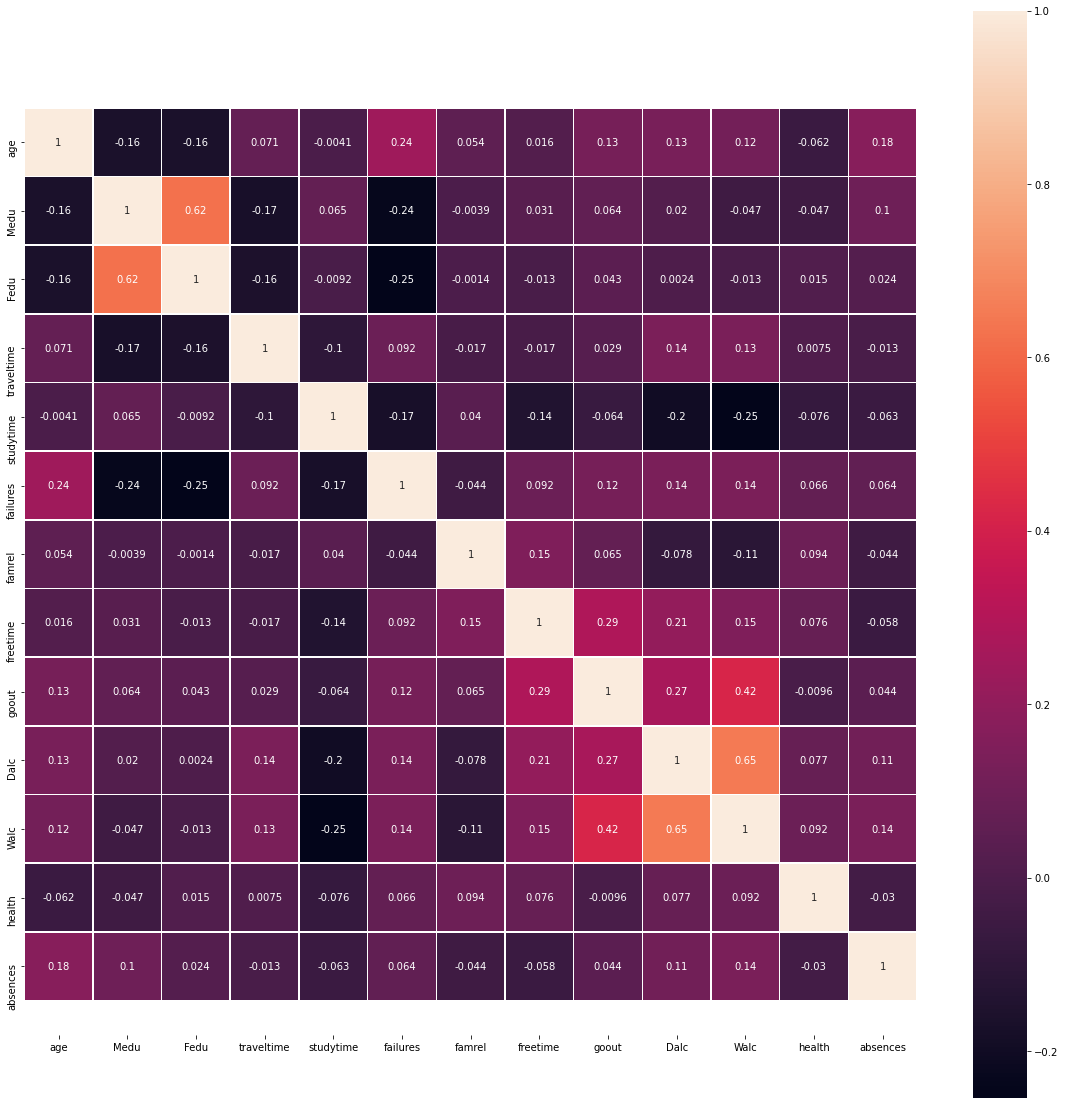

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(data.corr(), annot=True, linewidths=.5, square=True, ax= ax)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

### удалим коррелирющиеся признаки

In [13]:
#Medu - mother's education/Fedu - father's education  (numeric: 0 - none, 1 - primary education )
data = data.drop(columns = 'Fedu')

#Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
#Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
# goout - going out with friends (numeric: from 1 - very low to 5 - very high)
data = data.drop(columns = 'Walc')

data["paid"] = data["paid"].astype('category')
data["paid"] = data["paid"].cat.codes

(11.5, -0.5)

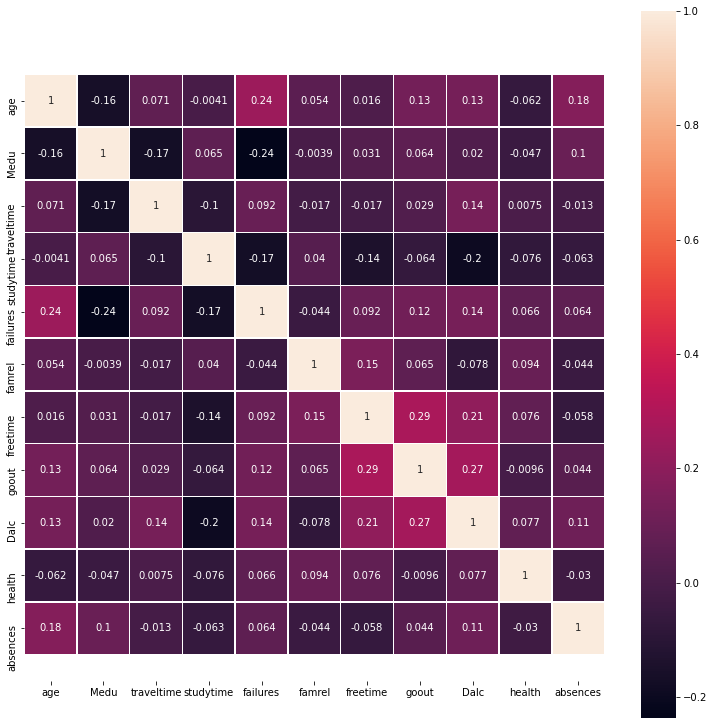

In [14]:
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(data.corr(), annot=True, linewidths=.5, square=True, ax= ax)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

In [15]:
data.corr()

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,health,absences
age,1.000000,-0.163658,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,-0.062187,0.175230
Medu,-0.163658,1.000000,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.046878,0.100285
traveltime,0.070641,-0.171639,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.007501,-0.012944
studytime,-0.004140,0.064944,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.075616,-0.062700
failures,0.243665,-0.236680,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.065827,0.063726
famrel,0.053940,-0.003914,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,0.094056,-0.044354
freetime,0.016434,0.030891,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.075733,-0.058078
goout,0.126964,0.064094,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,-0.009577,0.044302
Dalc,0.131125,0.019834,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.077180,0.111908
health,-0.062187,-0.046878,0.007501,-0.075616,0.065827,0.094056,0.075733,-0.009577,0.077180,1.000000,-0.029937


In [16]:
data = pd.get_dummies(data)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   traveltime         395 non-null    int64
 3   studytime          395 non-null    int64
 4   failures           395 non-null    int64
 5   famrel             395 non-null    int64
 6   freetime           395 non-null    int64
 7   goout              395 non-null    int64
 8   Dalc               395 non-null    int64
 9   health             395 non-null    int64
 10  absences           395 non-null    int64
 11  school_GP          395 non-null    uint8
 12  school_MS          395 non-null    uint8
 13  sex_F              395 non-null    uint8
 14  sex_M              395 non-null    uint8
 15  address_R          395 non-null    uint8
 16  address_U          395 non-null    uint8
 17  famsize_GT3     

In [18]:
data.head()

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,health,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,2,2,0,4,3,4,1,3,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,2,0,5,3,3,1,3,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,2,3,4,3,2,2,3,...,1,0,0,1,0,1,0,1,1,0
3,15,4,1,3,0,3,2,2,1,5,...,0,1,0,1,0,1,0,1,0,1
4,16,3,1,2,0,4,3,2,1,5,...,1,0,0,1,0,1,1,0,1,0


#Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
data = pd.get_dummies(data, columns=["Medu"])
#не надо преобразовывать!!!

In [19]:
data.iloc[:, 0:5].corr()

,age,Medu,traveltime,studytime,failures
age,1.000000,-0.163658,0.070641,-0.004140,0.243665
Medu,-0.163658,1.000000,-0.171639,0.064944,-0.236680
traveltime,0.070641,-0.171639,1.000000,-0.100909,0.092239
studytime,-0.004140,0.064944,-0.100909,1.000000,-0.173563
failures,0.243665,-0.236680,0.092239,-0.173563,1.000000


(10.5, -0.5)

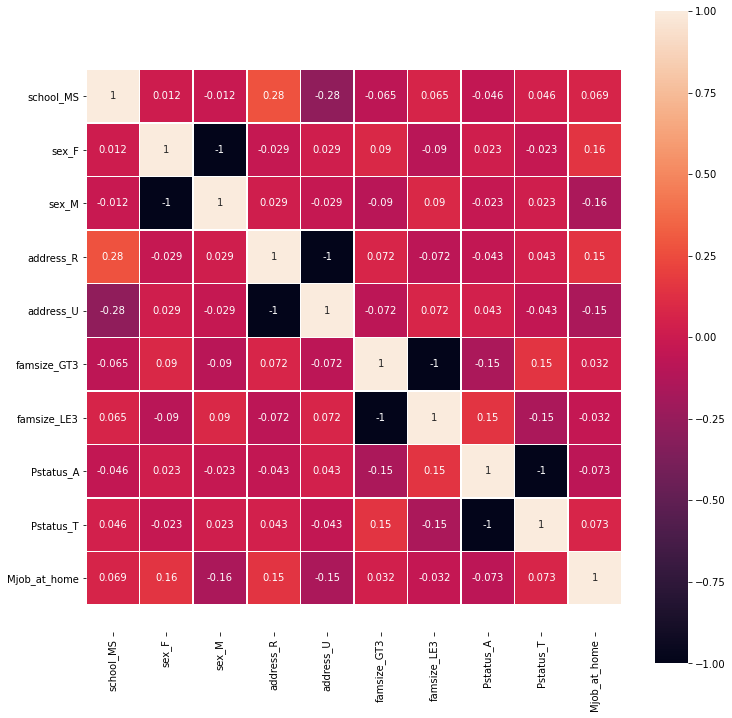

In [20]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data.iloc[:, 12:22].corr(), annot=True, linewidths=.5, square=True, ax= ax)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

In [21]:
data = data.drop(columns = ['school_MS', 'sex_M','address_R', 'famsize_GT3','Pstatus_T'])

(5.5, -0.5)

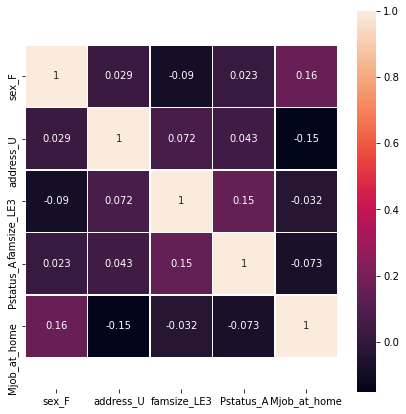

In [22]:
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(data.iloc[:, 12:17].corr(), annot=True, linewidths=.5, square=True, ax= ax)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

(10.5, -0.5)

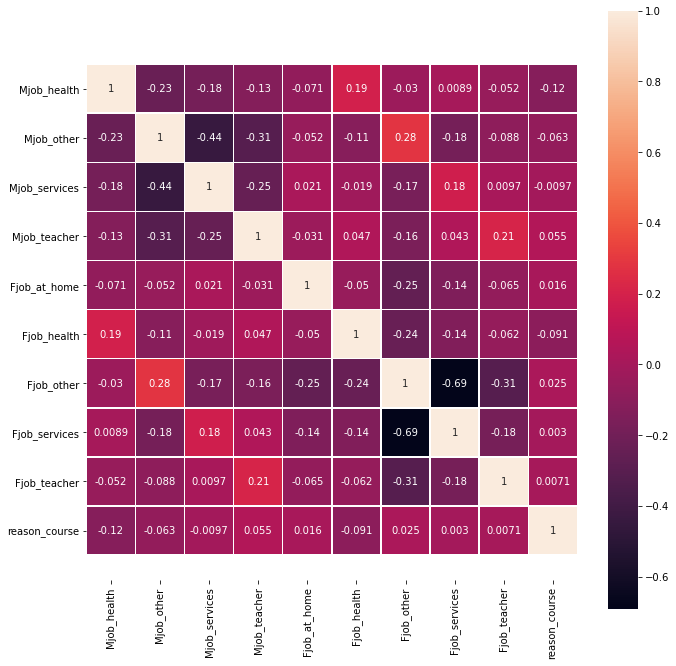

In [23]:
fig, ax = plt.subplots(figsize=(11,11))
ax = sns.heatmap(data.iloc[:, 17:27].corr(), annot=True, linewidths=.5, square=True, ax= ax)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

In [24]:
data = data.drop(columns = ['Mjob_other', 'Fjob_other'])

(8.5, -0.5)

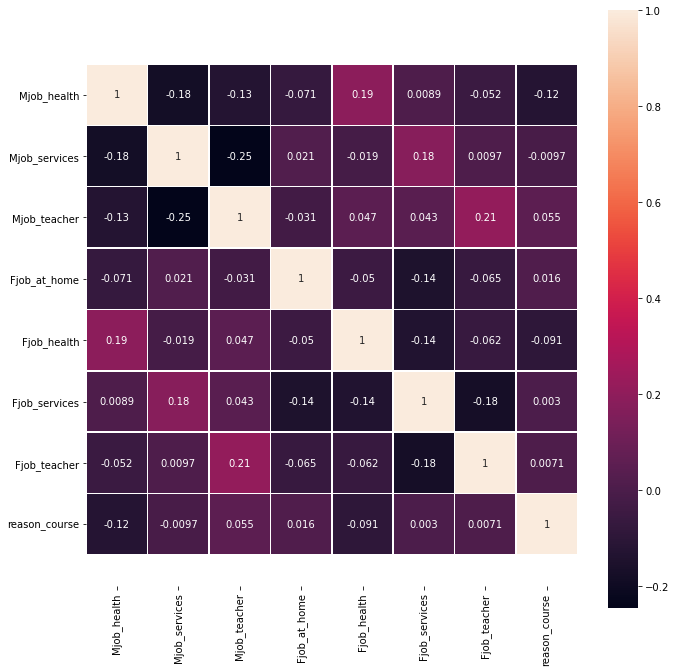

In [25]:
fig, ax = plt.subplots(figsize=(11,11))
ax = sns.heatmap(data.iloc[:, 17:25].corr(), annot=True, linewidths=.5, square=True, ax= ax)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

(11.5, -0.5)

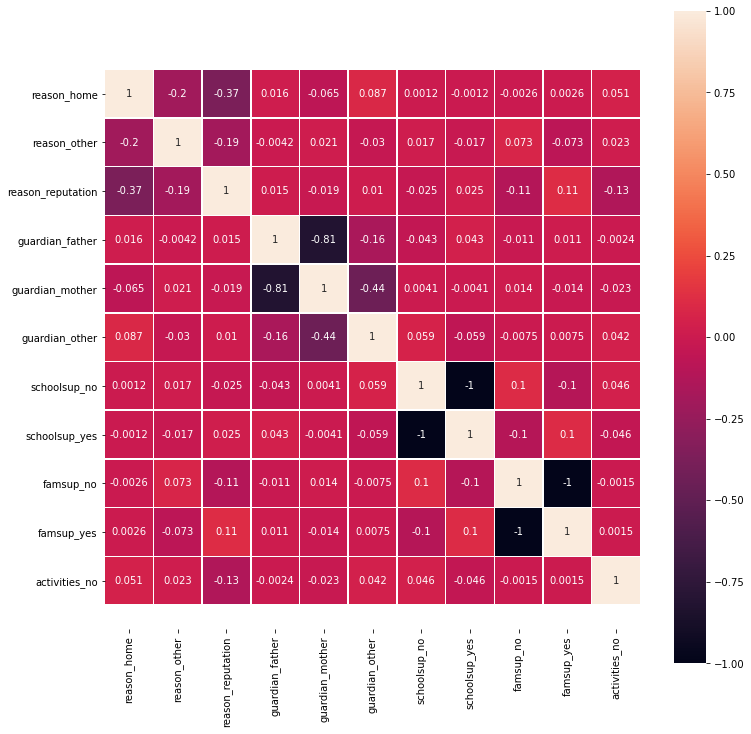

In [26]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data.iloc[:, 25:36].corr(), annot=True, linewidths=.5, square=True, ax= ax)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

In [27]:
data = data.drop(columns = ['reason_course','reason_home', 'guardian_mother', 'schoolsup_yes', 'famsup_yes'])

(6.5, -0.5)

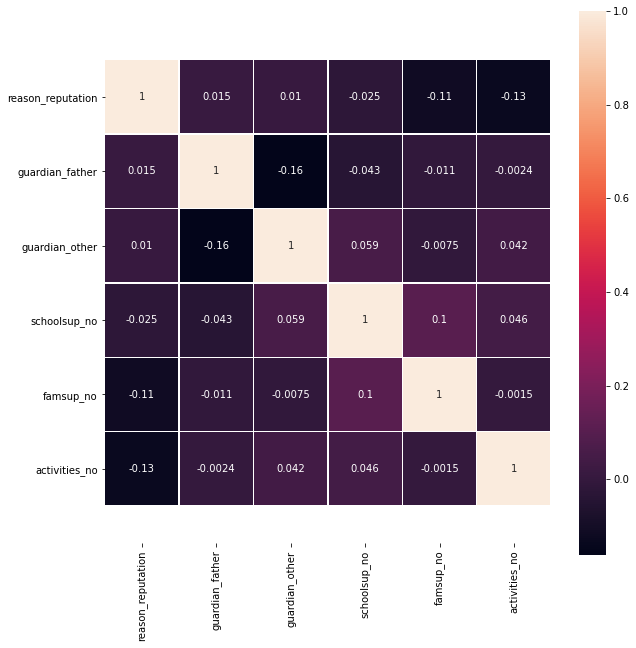

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(data.iloc[:, 25:31].corr(), annot=True, linewidths=.5, square=True, ax= ax)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

(9.5, -0.5)

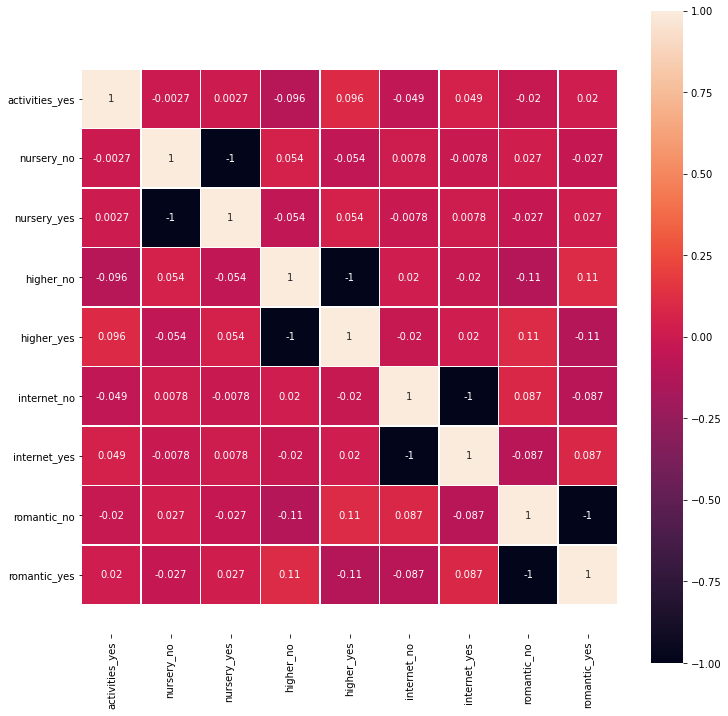

In [29]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data.iloc[:, 31:41].corr(), annot=True, linewidths=.5, square=True, ax= ax)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

In [30]:
data = data.drop(columns = ['activities_yes','nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes'])

(18.5, -0.5)

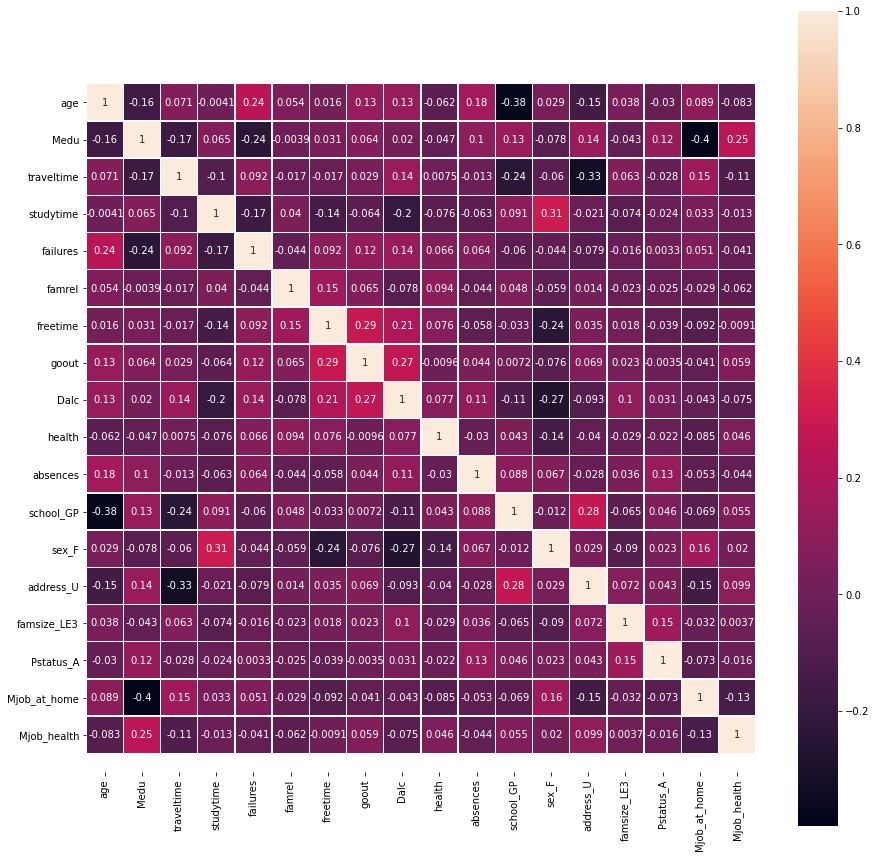

In [31]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(data.iloc[:, 0:18].corr(), annot=True, linewidths=.5, square=True, ax= ax)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

(16.5, -0.5)

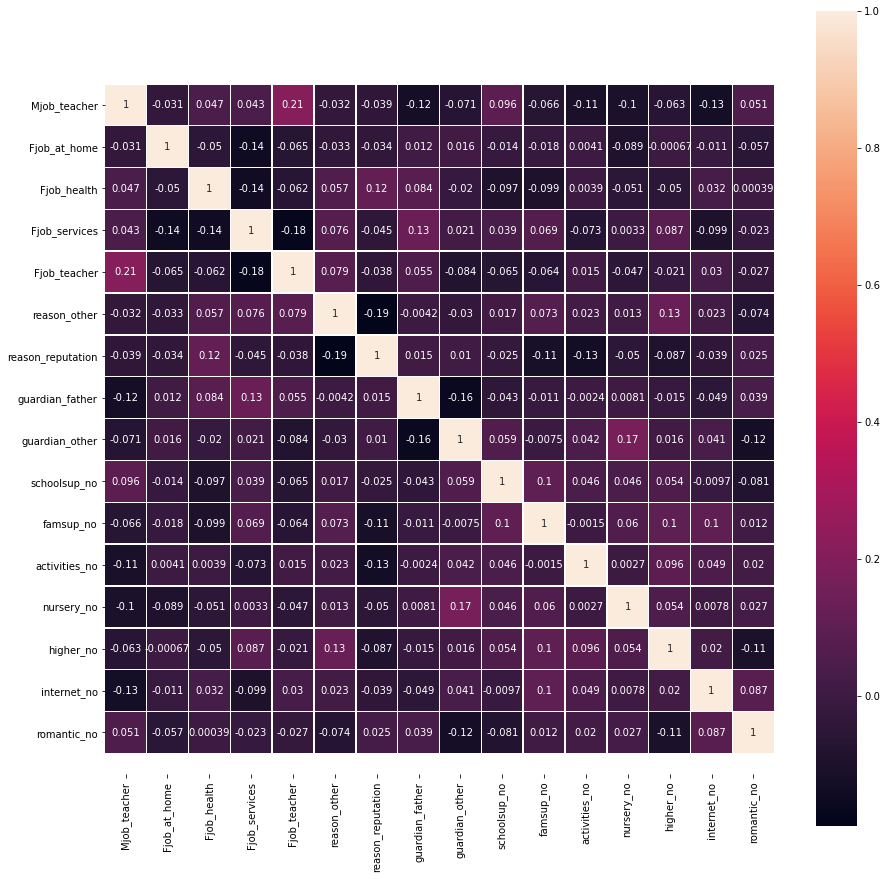

In [32]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(data.iloc[:, 19:].corr(), annot=True, linewidths=.5, square=True, ax= ax)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   traveltime         395 non-null    int64
 3   studytime          395 non-null    int64
 4   failures           395 non-null    int64
 5   famrel             395 non-null    int64
 6   freetime           395 non-null    int64
 7   goout              395 non-null    int64
 8   Dalc               395 non-null    int64
 9   health             395 non-null    int64
 10  absences           395 non-null    int64
 11  school_GP          395 non-null    uint8
 12  sex_F              395 non-null    uint8
 13  address_U          395 non-null    uint8
 14  famsize_LE3        395 non-null    uint8
 15  Pstatus_A          395 non-null    uint8
 16  Mjob_at_home       395 non-null    uint8
 17  Mjob_health     

In [34]:
data.describe()

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,health,...,reason_reputation,guardian_father,guardian_other,schoolsup_no,famsup_no,activities_no,nursery_no,higher_no,internet_no,romantic_no
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,3.554430,...,0.265823,0.227848,0.081013,0.870886,0.387342,0.491139,0.205063,0.050633,0.167089,0.665823
std,1.276043,1.094735,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.390303,...,0.442331,0.419976,0.273201,0.335751,0.487761,0.500555,0.404260,0.219525,0.373528,0.472300
min,15.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,18.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,5.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42, shuffle=True)

In [37]:
X_train

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,health,...,reason_reputation,guardian_father,guardian_other,schoolsup_no,famsup_no,activities_no,nursery_no,higher_no,internet_no,romantic_no
17,16,3,3,2,0,5,3,2,1,4,...,1,0,0,0,0,0,0,0,1,1
165,16,3,2,1,1,4,5,2,1,2,...,0,0,0,1,0,0,1,1,1,1
24,15,2,1,3,0,4,3,2,1,5,...,0,0,0,0,0,0,0,0,0,1
126,15,3,1,2,0,5,3,2,1,1,...,0,0,0,0,1,0,0,0,0,0
346,18,4,1,3,0,5,3,2,1,4,...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,15,4,1,4,0,3,3,3,1,3,...,0,0,0,1,1,1,0,0,0,1
106,15,2,1,4,0,5,1,2,1,3,...,0,0,0,0,0,1,0,0,0,1
270,19,3,1,2,2,4,3,5,3,5,...,0,0,1,1,0,0,0,0,0,1
348,17,4,1,3,0,4,4,3,1,4,...,1,0,0,1,0,0,0,0,0,0


In [38]:
clf_rf = RandomForestClassifier()

In [39]:
#parameters = {'n_estimators' : [10, 30, 50, 70,90,100, 120, 140, 160, 180, 200], 'max_depth': [2, 5, 7 ,10, 15]}
#parameters = {'n_estimators' : [10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250], 
              #'max_depth': [2, 5, 7 ,10, 15, 20, 25, 30,35,40,45]}
#parameters = {'n_estimators' : [25, 50, 75, 100, 110, 113, 115,118, 120, 122, 125, 127, 130], 
              #'max_depth': [5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 30]}
parameters = {'n_estimators' : [25,30, 35,40,45,50,55,60,70, 75, 100, 110, 113, 115,118, 120,122], 
              'max_depth': [5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 30]}

In [40]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=6)

In [41]:
grid_search_cv_clf.fit(X_train, y_train) #подбор оптимальной комбинации параметров+

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                       17, 18, 19, 20, 22, 23, 24, 25, 26, 27,
                                       30],
                         'n_estimators': [25, 30, 35, 40, 45, 50, 55, 60, 70,
                                          75, 100, 110, 113, 115, 118, 120,
                                          122]})

In [42]:
grid_search_cv_clf.best_params_ #до этого было 100, 10 и 140, 10 и 160, 7 b 50, 15 и 50, 7 b 150, 15 b 100, 5 b 100, 7 b 70, 
#20 b 200, 7 b 100, 40 и 50, 7 и 100,35 и 100
#22 b 120, 10 и 110, 12 b 50, 19 b 120, 

{'max_depth': 8, 'n_estimators': 55}

In [43]:
best_clf = grid_search_cv_clf.best_estimator_

best_clf.score(X_train, y_train)

In [44]:
best_clf.score(X_test, y_test)


0.6050420168067226

In [45]:
best_clf.feature_importances_

array([0.05290664, 0.0399476 , 0.0260302 , 0.05317047, 0.03759973,
       0.06985056, 0.04083045, 0.0544031 , 0.04221543, 0.04995296,
       0.07647367, 0.00668201, 0.02115955, 0.01221488, 0.01391691,
       0.01277486, 0.01036371, 0.01262021, 0.02218767, 0.01965876,
       0.00858127, 0.01801685, 0.01913491, 0.01496233, 0.02081584,
       0.01375994, 0.01960332, 0.01054683, 0.01348081, 0.07885448,
       0.01707027, 0.01545092, 0.03719704, 0.01857544, 0.01899039])

In [46]:
y_pred = best_clf.predict(X_test)

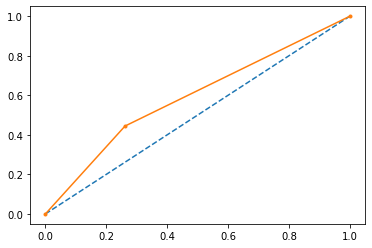

In [47]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## градиентный бустинг

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
clf_gb = GradientBoostingClassifier()

In [50]:
parameters_gb = {'n_estimators' : 100, 
              'max_depth': 2}

In [51]:
grid_search_gb = GridSearchCV(clf_rf, parameters, cv=5)

In [52]:
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                       17, 18, 19, 20, 22, 23, 24, 25, 26, 27,
                                       30],
                         'n_estimators': [25, 30, 35, 40, 45, 50, 55, 60, 70,
                                          75, 100, 110, 113, 115, 118, 120,
                                          122]})

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

for i in (1, 0.5, 0.3, 0.2, 0.1):
    clf = GradientBoostingClassifier(n_estimators=20, verbose=True, learning_rate = i, random_state=1)
    clf.fit(X_train, y_train)
    print("Learning rate: ", i)
    print("Accuracy score (training): {0:.3f}".format(clf.score(X_train, y_train)))

      Iter       Train Loss   Remaining Time 
         1           1.1523            5.73s
         2           0.9769            2.72s
         3           0.8424            1.72s
         4           0.7514            1.22s
         5           0.7012            0.92s
         6           0.6390            0.72s
         7           0.5649            0.58s
         8           0.5154            0.47s
         9           0.4888            0.38s
        10           0.4542            0.31s
        20           0.2013            0.00s
Learning rate:  1
Accuracy score (training): 0.982
      Iter       Train Loss   Remaining Time 
         1           1.2198            0.02s
         2           1.1026            0.02s
         3           1.0632            0.02s
         4           0.9853            0.02s
         5           0.9139            0.02s
         6           0.8432            0.02s
         7           0.8028            0.02s
         8           0.7546            0.02s
  

In [54]:
y_pred_gbc = clf.predict(X_test)

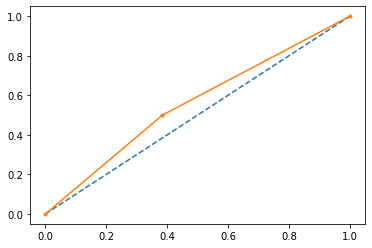

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gbc)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()